In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sb

In [64]:
all_data = []
sensor_name = []
for f in glob.glob('F:\\mgl_air_data\\purple_air\\new\\*'): #folder for your data (Windows)
    df = pd.read_csv(f, index_col=0)
    df['time_stamp'] = pd.to_datetime(df['time_stamp'])
    all_data.append(df)
    s = f.split('\\')
    s = s[-1].split('.')
    s = s[0].split('_')
    s = '_'.join(s[:-1])
    sensor_name.append(s)
    print (f)

F:\mgl_air_data\purple_air\new\bayan-Ulgii_01_2022.csv
F:\mgl_air_data\purple_air\new\Gobi-Altai_04_2022.csv
F:\mgl_air_data\purple_air\new\Khobd_01_2022.csv
F:\mgl_air_data\purple_air\new\Ubs_01_2022.csv
F:\mgl_air_data\purple_air\new\Zabkhan_01_2022.csv


In [65]:
all_data[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 358
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time_stamp    359 non-null    datetime64[ns]
 1   sensor_index  359 non-null    int64         
 2   pm2.5_atm     359 non-null    float64       
 3   pm2.5_cf_1    359 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 14.0 KB


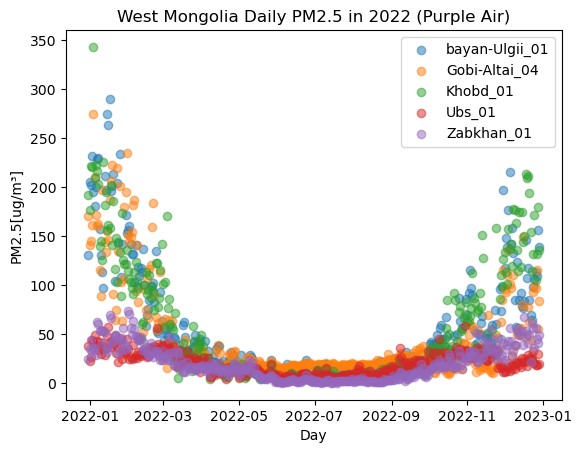

In [68]:
for i, d in enumerate(all_data):
    plt.scatter(d['time_stamp'], d['pm2.5_atm'], label=f'{sensor_name[i]}',alpha=0.5)
plt.title(f'West Mongolia Daily PM2.5 in 2022 (Purple Air)')
plt.ylabel('PM2.5[ug/m³]')
plt.xlabel('Day')
plt.legend()

In [71]:
new_order = [2, 0, 1, 4, 3] #hard-coded
all_data = [all_data[i] for i in new_order]

In [72]:
sensor_level = {'Good':[], 'Moderate':[], 'Unhealthy(sensitive group)':[], 'Unhealthy':[], 'Very Unhealthy':[], 'Hazardous': []}
for i, d in enumerate(all_data):
    d = d['pm2.5_atm']
    totaldays = d.shape[0]/100
    sensor_level['Good'].append(d[d<12.0].count()/totaldays)
    sensor_level['Moderate'].append(d[(d>=12.0) & (d<35.4)].count()/totaldays)
    sensor_level['Unhealthy(sensitive group)'].append(d[(d>=35.4) & (d<55.4)].count()/totaldays)
    sensor_level['Unhealthy'].append(d[(d>=55.4) & (d<150.4)].count()/totaldays)
    sensor_level['Very Unhealthy'].append(d[(d>=150.4) & (d<250.4)].count()/totaldays)
    sensor_level['Hazardous'].append(d[d>=250.4].count()/totaldays)
df = pd.DataFrame(sensor_level, index=sensor_name)

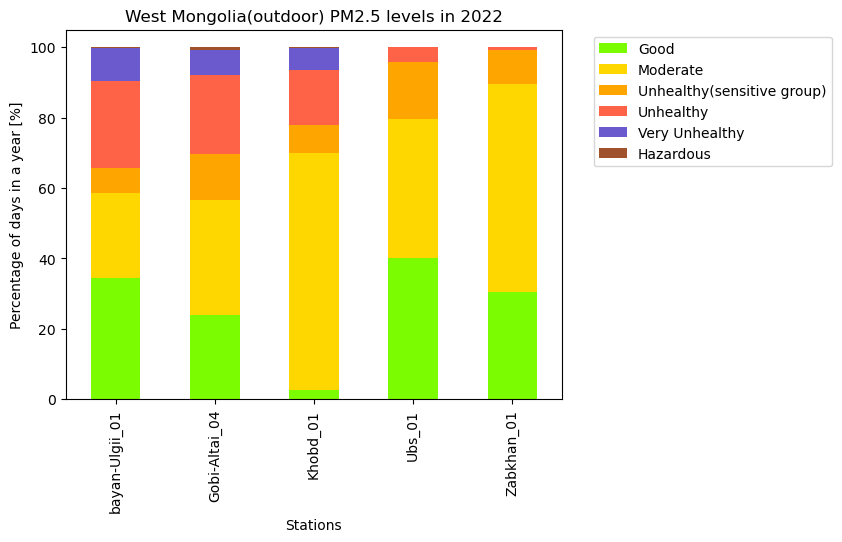

In [74]:
df.plot(kind='bar', stacked=True, color=['lawngreen', 'gold', 'orange', 'tomato', 'slateblue', 'sienna'])
#plt.ylim(0,620) 
#box = plt.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Stations")
plt.ylabel("Percentage of days in a year [%]")
plt.title("West Mongolia(outdoor) PM2.5 levels in 2022")
plt.show()